### Trabalho prático de Inteligência artificial

#### Aluno: Matheus Piltz Scariot
#### RGA: 202119070129

# Base de dados 1

1.1 – Problema

A base de dados fetch_covtype, é uma das disponíveis na bibiblioteca sklearn, ela oferece dados sobre a topologia florestas.

1.2 – Análise Exploratória dos Dados

A base de dados possui 54 atriburos, dentre eles a elevação, o aspecto dessa vegetação, a distancia horizontal para a hidrologia (acredito que seja elevação para o nível do mar), a distancia vertical para a hidrologia, entre vários outros. Todos os dados são numéricos e estão normalizados.

In [257]:
from sklearn.datasets import fetch_covtype as fc

cov_type = fc()

1.3 – Pré-processamento dos Dados

Como todos dos dados são numéricos e estão normalizados, não há a necessidade de realizar um processamento desses dados. Entretanto como há muitos registros, limitei a pegar apenas os primeiros 150, para que o algoritmo rode mais rápido.

1.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [258]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(var_smoothing=1e-5)

1.5 – Validação Cruzada

In [259]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=2)

predicter_class = dict()
predicter_class['tree'] = np.zeros(cov_type.target[:150].shape[0])
predicter_class['knn'] = np.zeros(cov_type.target[:150].shape[0])
predicter_class['nayve'] = np.zeros(cov_type.target[:150].shape[0])

In [261]:
target = cov_type.target[:150]
data = cov_type.data[:150]

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

1.6 – Comparação dos Resultados


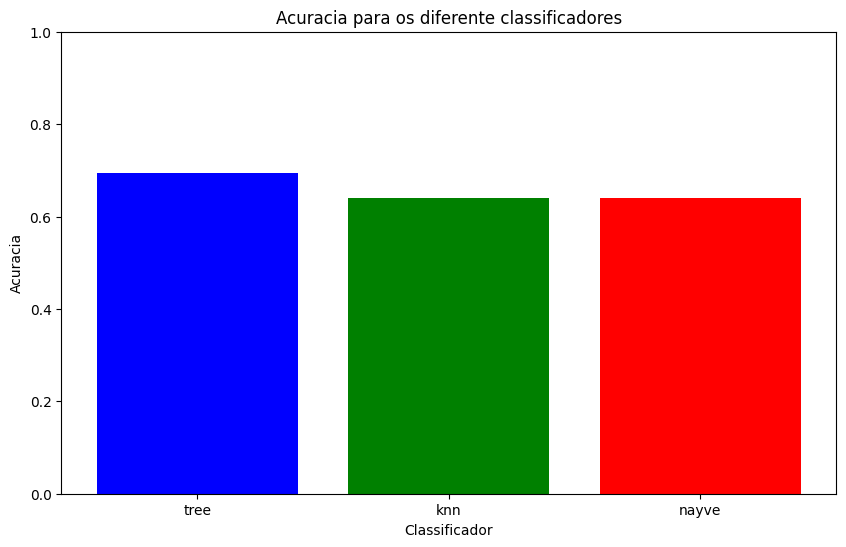

In [262]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt
import pandas as pd


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1)
plt.show()

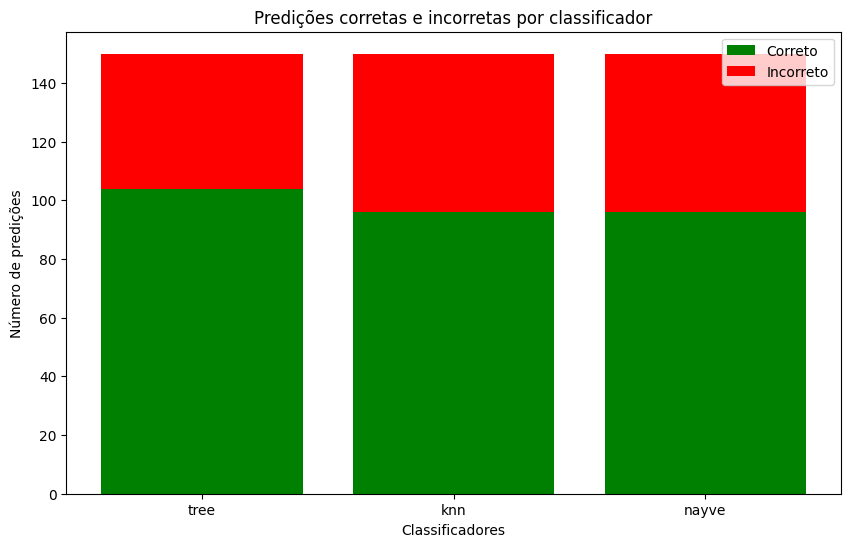

In [263]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

1.7 – Discussão

Os resultados para essa base de dados foram bem medianos, não consegui melhora-los com alteção dos parametros

# Base de dados 2

2.1 – Problema

A base de dados breast cancer lida com dados de cancer de mama de Wisconsin.

In [57]:
from sklearn import datasets

data = datasets.load_breast_cancer()

2.2 – Análise Exploratória dos Dados

A base de dados possui 30 atributos raio médio, textura média, pior dimensão fractal dentre outros. Todos os dados são numéricos e estão normalizados.


2.3 – Pré-processamento dos Dados

Como todos dos dados são numéricos e estão normalizados, não há a necessidade de realizar um processamento desses dados.

2.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [58]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=3)
naive_bayes = GaussianNB(var_smoothing=1e-9)

2.5 – Validação Cruzada

In [59]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [60]:
target = data.target
data = data.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

2.6 – Comparação dos Resultados

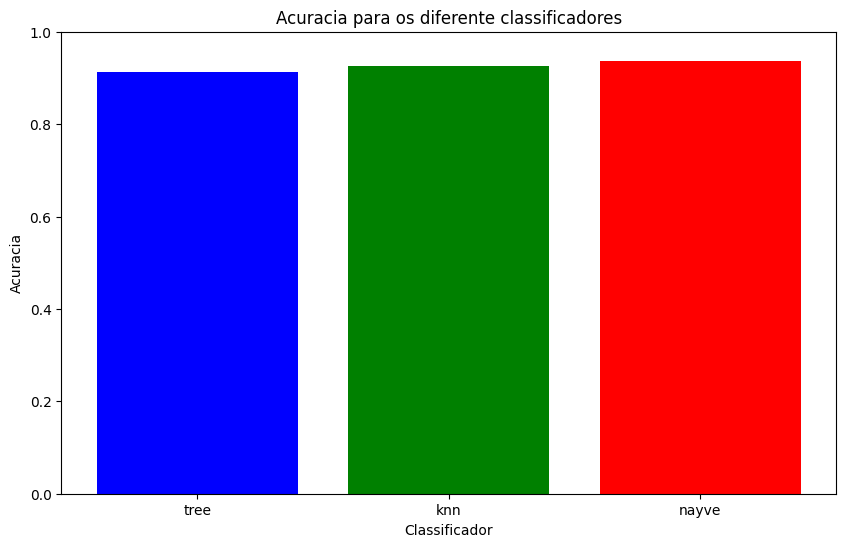

In [61]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt
import pandas as pd


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

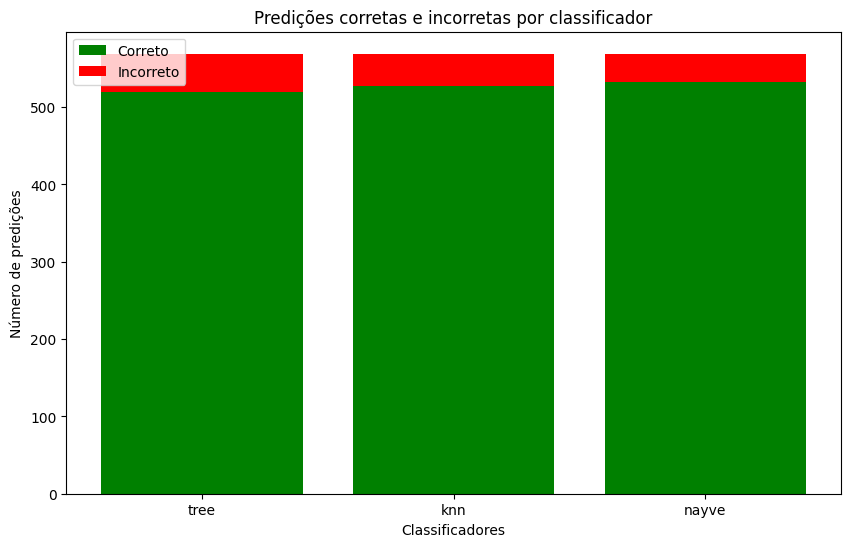

In [62]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

2.7 – Discussão

Podemos verificar no segundo gráfico que todos os algoritmos tiveram uma quantidade de acertos igual em escala, todos estando acima dos 500 acertos,com o nayve baies tendo o maior número de acertos. Em relação a acuracia, o algoritmo de árvore de decisão foi ligeiramente inferior.

### Árvore de decisão

O parâmetro criterion estabelecido como entropy teve um desempenho superior ao gini.

---

### KNN

A alteração do parametro n_neighbors não surtiu efeitos visiveis.

---

### Nayve Baies

O parâmetro var_smoothing se saiu de forma superior com o valor default.

# Base de dados 3

3.1 – Problema

O conjunto de dados diabetes é dispolonibilizado pela sklearn e possui dados de pacientes com diabetes.

In [129]:
from sklearn import datasets

data = datasets.load_diabetes() 

3.2 – Análise Exploratória dos Dados

O conjunto possui 10 atributos, como idade, sexo e indicadores de saúde.

3.3 – Pré-processamento dos Dados

Novamente não há a necessidade de um tratamento dos dados, pois eles já são numéricos e estão normalizados.

3.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [130]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(var_smoothing=1e-9)

3.5 – Validação Cruzada

In [131]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=6)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [132]:
target = data.target
data = data.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

C:\Users\JRena\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


3.6 – Comparação dos Resultados

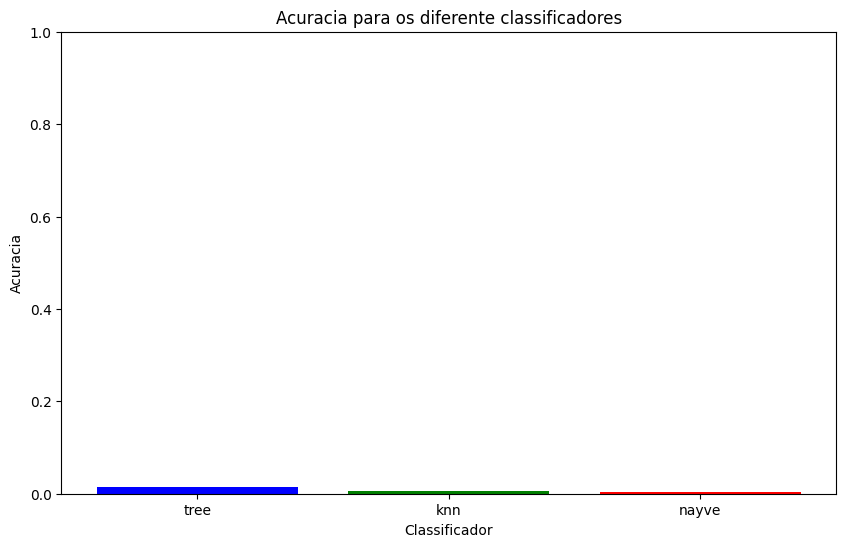

In [133]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt
import pandas as pd


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

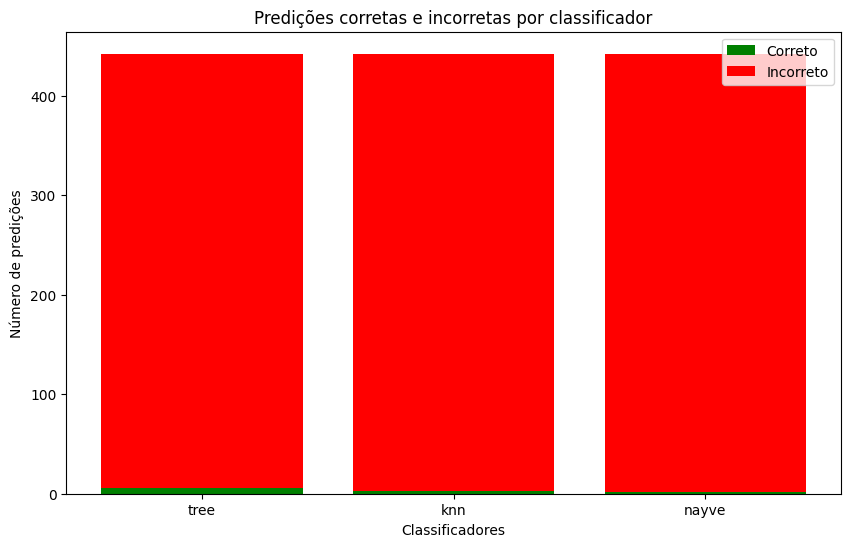

In [134]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

3.7 – Discussão

Essa base de dados possui algo em particular em que os algoritmos não se sairam bem, todos ele tiveram péssimas métricas, os ajustes de parametros não surtiram efeitos para melhorar. Aumentar a quantidade de validações cruzadas até deu uma melhorada, mas continuou bem baixo.

### Árvore de decisão

O criterion que teve o melhor desempenho foi o entropy

---

### KNN 

O número de classes descrito na documentação é 2, portanto mantive esse valor.

---

### Nayve baies

A mudança do parametro não alterou significativamente o resultado

# Base de dados 4

4.1 – Problema

A base de dados Customer Churn Prediction informa dados de cliente de uma empresa, usaremos a última coluna, que informa se houve rotatividade para esse cliente, como target;

In [103]:
import pandas as pd

df = pd.read_csv(r"datasets\04 - Customer Churn Prediction\customer_churn_data.csv")

4.2 – Análise Exploratória dos Dados

4.3 – Pré-processamento dos Dados

Aqui foi necessário adaptar os dados, atributos que são cadeias de caracteres em numero.

In [ ]:
df = df.drop(["customerID"], axis=1)

df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
df['Partner'] = df['Partner'].replace({ 'Yes' : 1, 'No' : 0 })
df['Dependents'] = df['Dependents'].replace({ 'Yes' : 1, 'No' : 0 })
df['PhoneService'] = df['PhoneService'].replace({ 'Yes' : 1, 'No' : 0 })
df['MultipleLines'] = df['MultipleLines'].replace({ 'Yes' : 1, 'No' : 0, 'No phone service' : 2 })
df['InternetService'] = df['InternetService'].replace({ 'No' : 0, 'DSL' : 1, 'Fiber optic' : 2 })
df['OnlineSecurity'] = df['OnlineSecurity'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['OnlineBackup'] = df['OnlineBackup'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['DeviceProtection'] = df['DeviceProtection'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['TechSupport'] = df['TechSupport'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['StreamingTV'] = df['StreamingTV'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['StreamingMovies'] = df['StreamingMovies'].replace({ 'Yes' : 1, 'No' : 0, 'No internet service' : 2 })
df['Contract'] = df['Contract'].replace({ 'Month-to-month' : 0, 'One year' : 1, 'Two year' : 2 })
df['PaperlessBilling'] = df['PaperlessBilling'].replace({ 'Yes' : 1, 'No' : 0 })
df['PaymentMethod'] = df['PaymentMethod'].replace({ 'Bank transfer' : 0, 'Mailed check' : 1, 'Electronic check' : 2, 'Credit card' : 3 })
df['Churn'] = df['Churn'].replace({ 'Yes' : 1, 'No' : 0 })

Após esse processo de converter as cadeias de caracteres foi necessário realizar a normalização dos dados.

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

4.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [106]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(priors=[0.5, 0.5], var_smoothing=1e-5)

4.5 – Validação Cruzada

Para a validação cruzada foi utilizada a técnica ensinada na video aula.

In [107]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)

predicter_class = dict()
predicter_class['tree'] = np.zeros(df_normalized['Churn'].shape[0])
predicter_class['knn'] = np.zeros(df_normalized['Churn'].shape[0])
predicter_class['nayve'] = np.zeros(df_normalized['Churn'].shape[0])

In [108]:
target = df_normalized['Churn']
data = df_normalized.drop(['Churn'], axis=1)

for train, test in kf.split(data, target):
    data_train, target_train = data.iloc[train], target.iloc[train]
    data_test, targt_test = data.iloc[test], target.iloc[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

4.6 – Comparação dos Resultados

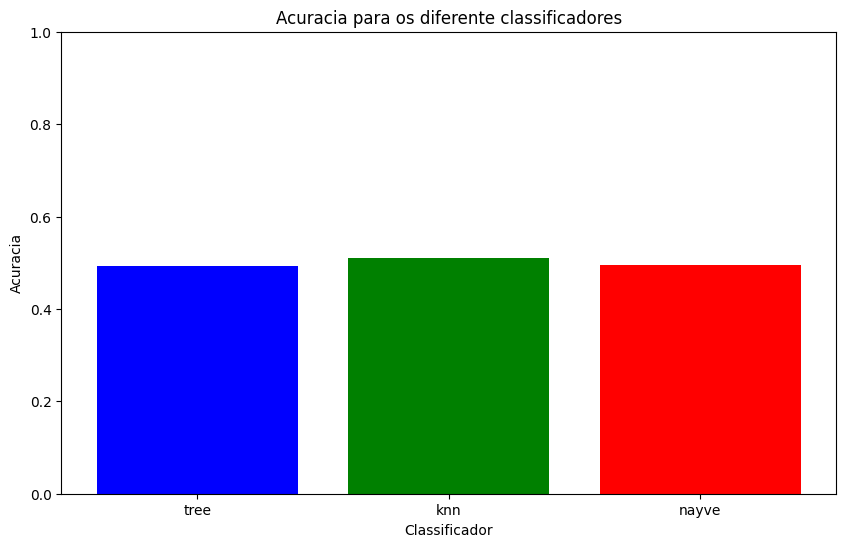

In [109]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

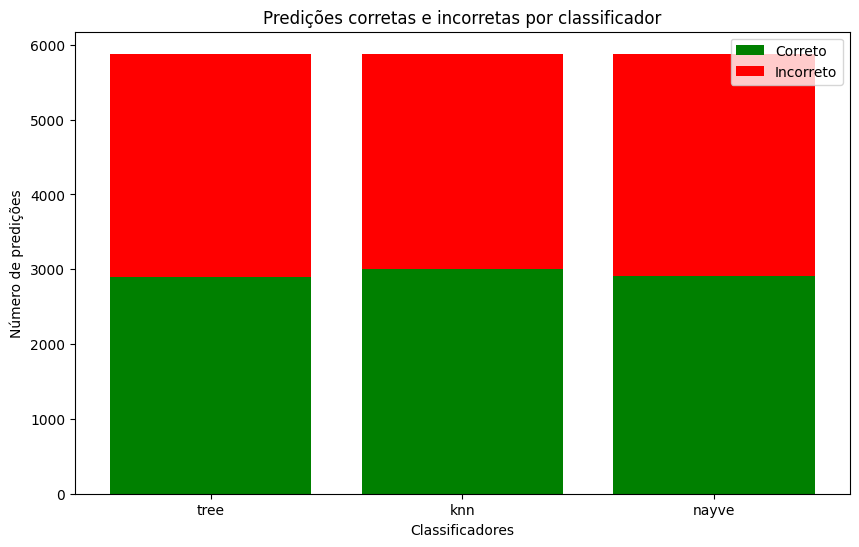

In [110]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

4.7 – Discussão

Podemos observar no primeiro gráfico que não houve muita diferença na acuracia de ambos os classificadores, O knn ficou um pouco acima, mas nada significativo.
No segundo gráfico que mostra a quantidade de acertos e erros tivemos a situação se repetindo, todo muito próximos e o knn ligeiramente superior.

## Parametros

* Árvore de Decisão

    Ambos os criterion tiveram o mesmo resultado, portanto o entropy foi mantido por ter sido abortado em aula; <br>
    Para o splitter a mesma situação;
--- 

* KNN

    O único parametro testado foi n_neighbors, que não apresentou mudança com os valores 2, 3, 4 e 5
---

* Nayve bayes

    O parametro priors foi mantido em 50% para ambas as classes pois elas possuem quantidades próximas; <br>
    O parametro var_smoothing não apresentou diferenças
---

A conclusão é que todos os algoritmos tiveram resultados parecidos, e os ajustes nos parametros não surtiram muitos efeitos.

# Base de dados 5

5.1 – Problema

O dataset digits possui dados de numero escritos a mão e é disponibilizado pela sklearn.

In [159]:
from sklearn import datasets

data = datasets.load_digits()

5.2 – Análise Exploratória dos Dados

O conjunto possui 64 atributos que são relativos aos pixels preenchidos.

5.3 – Pré-processamento dos Dados

Novamente não há a necessidade de um tratamento préveio dos dados, pois eles já estão numéricos e normalizados.

5.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [151]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
knn = KNeighborsClassifier(n_neighbors=10)
naive_bayes = GaussianNB(var_smoothing=1e-9)

5.5 – Validação Cruzada

In [152]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [153]:
target = data.target
data = data.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

5.6 – Comparação dos Resultados

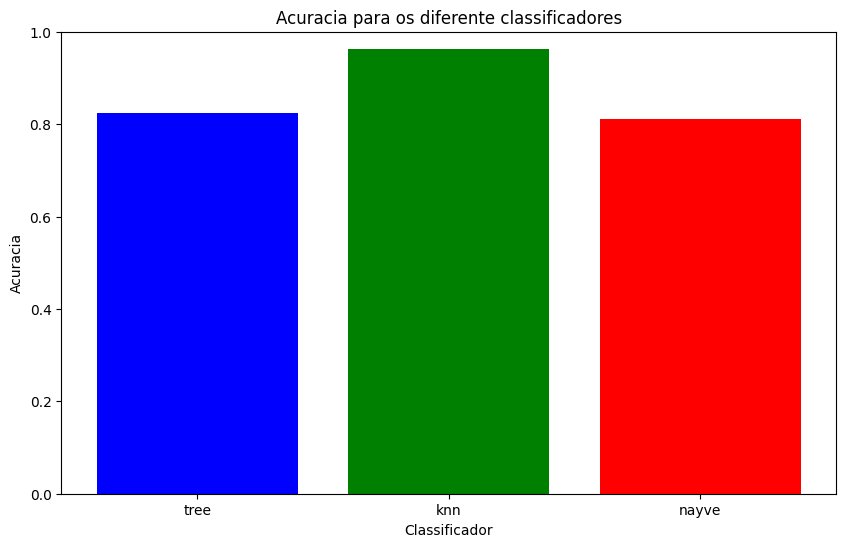

In [154]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

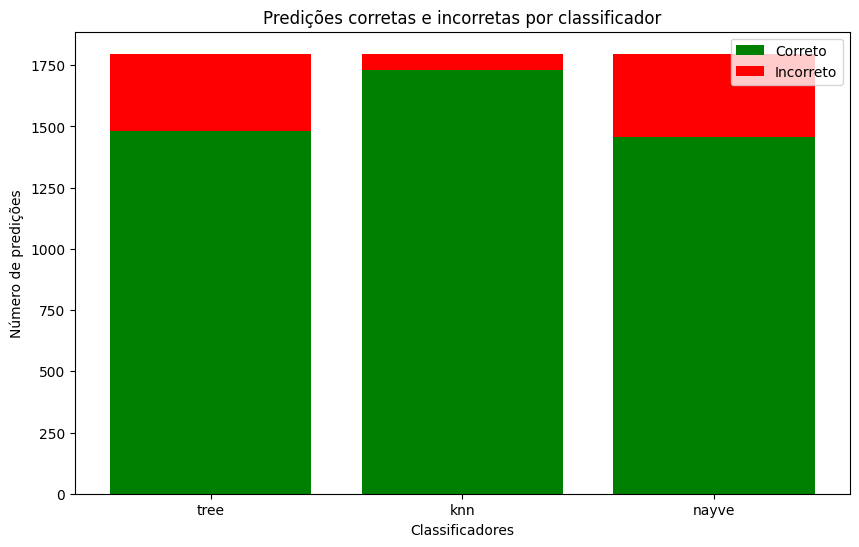

In [155]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

5.7 – Discussão

Esse é o primeiro algoritmo que temos uma grande diferença nos resultados com o KNN sendo significativamente melhor que os outros classificadores. Entretanto em todos os classificadores não tive uma diferença significativa nos resultados.

# Base de dados 6

6.1 – Problema

O conjunto de dados iris contem dados sobre flores da especie iris, também é disponibilizado pela sklearn.

In [204]:
from sklearn import datasets

data = datasets.load_iris()

6.2 – Análise Exploratória dos Dados

Neste exemplo temos 4 atributos sobre o como são as pétalas de cada flor.

6.3 – Pré-processamento dos Dados

Neste conjunto de dados vou aplicar uma normalização, pois o atributo petal width (cm) é muito menor que os outros.

In [205]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(data.data), columns=data.feature_names)

6.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [206]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
knn = KNeighborsClassifier(n_neighbors=3)
naive_bayes = GaussianNB(var_smoothing=1e-9)

6.5 – Validação Cruzada

In [207]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [208]:
target = data.target
data = df_normalized

for train, test in kf.split(data, target):
    data_train, target_train = data.iloc[train], target[train]
    data_test, targt_test = data.iloc[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

6.6 – Comparação dos Resultados

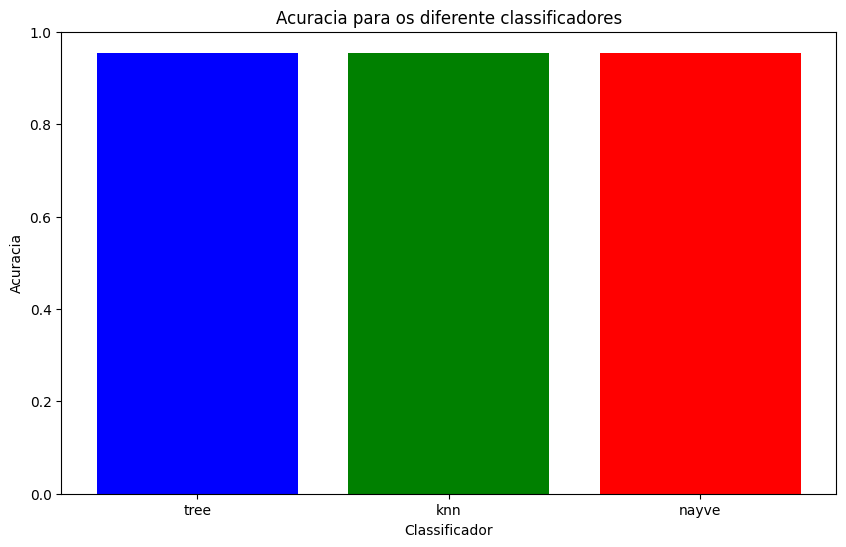

In [210]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

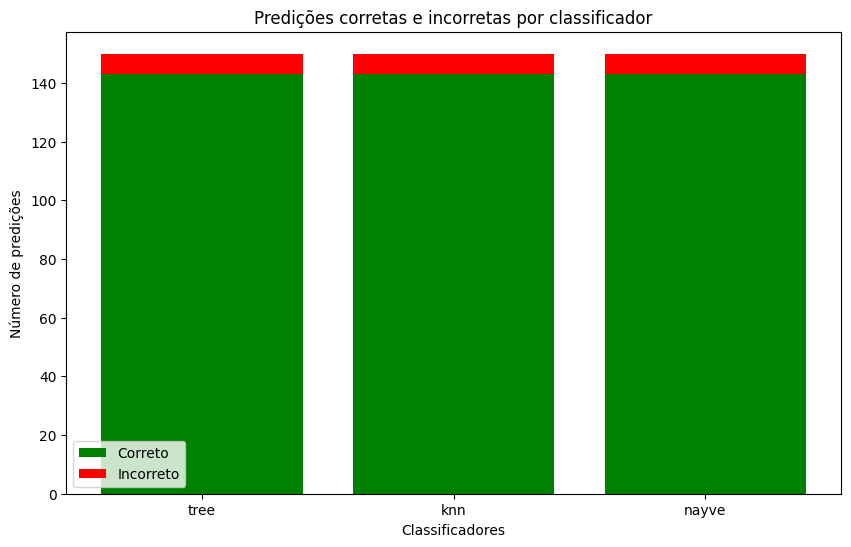

In [211]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

6.7 – Discussão

Novamente todos os classificadores tiveram desempenhos muito próximos, e a árvore de decisão foi ligeiramente melhor.

### Árvore de decisão

Entropy se demontrou melhor que gini para o parametro criterion

---

### KNN

Mais uma vez o numero de classes como parametro já apresentou um resultado satisfatório

---

### Nayve Baies 

Não houve diferença significativa entre o valor default e outros valores.

# Base de dados 7

7.1 – Problema

Essa base de dados também é disponibilizada pelo sklearn e reune dados sobre vinhos.

In [238]:
from sklearn import datasets

data = datasets.load_wine()

7.2 – Análise Exploratória dos Dados

O conjunto reune 13 atriburos como teor alcolico, o total de finóis entre outros critérios técnicos.

7.3 – Pré-processamento dos Dados

Não há a necessidade de um processamento, os dados estão numéricos e normalizados.

7.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [239]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='gini', splitter='best')
knn = KNeighborsClassifier(n_neighbors=3)
naive_bayes = GaussianNB(var_smoothing=1e-9)

7.5 – Validação Cruzada

In [240]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=5)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [241]:
target = data.target
data = data.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

7.6 – Comparação dos Resultados

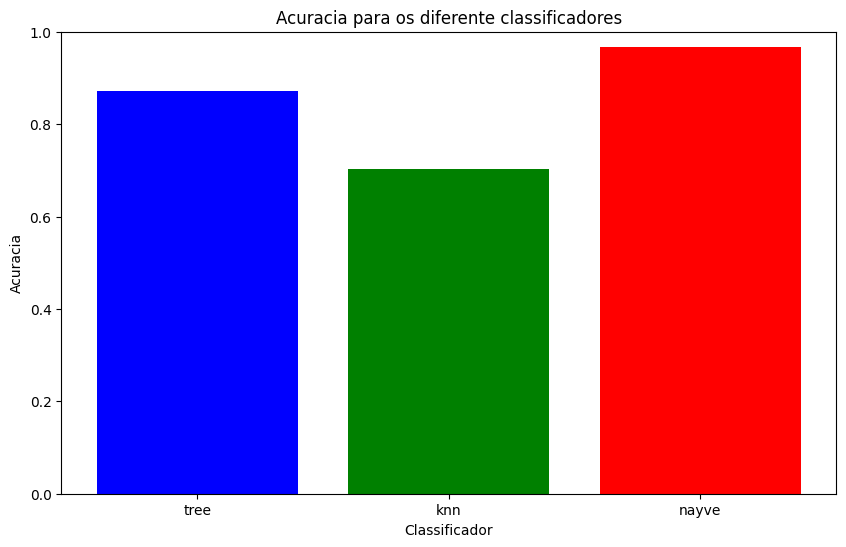

In [242]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

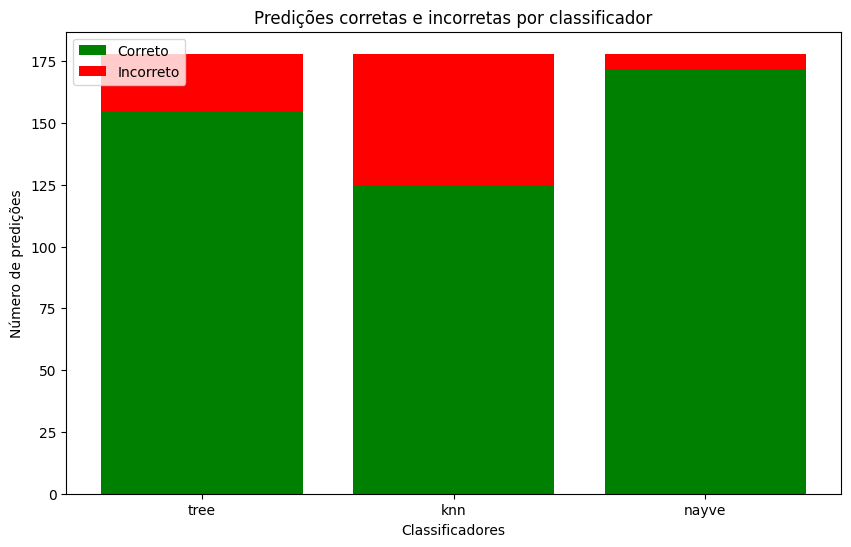

In [243]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

7.7 – Discussão

Essa foi a base de dados em que mais tive diferenças, com o KNN saindo consideralvelmente inferior aos outros classificadores. Em todos os algoritmos a alteração dos parametros não surtiu efeito, para o KNN nem mesmo a mudança na quantidade de validações cruzadas melhorou o desempenho.

# Base de dados 8

8.1 – Problema

Essa é uma base de dados disponibilizada pela kaggle com dados artificiais do desempenho de estudantes.

In [12]:
import pandas as pd

df = pd.read_csv(r"datasets\Student_performance_data _\Student_performance_data _.csv")

8.2 – Análise Exploratória dos Dados

No conjunto há informações sobre caracteristicas dos estudantes como idade e genero, além de informações relacionadas a educação como nível de educação dos pais e tempo de estudo semanal.

8.3 – Pré-processamento dos Dados

É necessário remover as colunas StudentID e GPA, a primeiro por ser apenas o ID do estudante, e a segunda por ser similar e a coluna alvo da análise.


In [13]:
df = df.drop(["StudentID"], axis=1)
df = df.drop(["GPA"], axis=1)

Além disso precisa realizar a normalização dos dados.

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

8.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [15]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(var_smoothing=1e-5)

8.5 – Validação Cruzada

In [16]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = df_normalized['GradeClass'].shape[0]

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [ ]:
target = cov_type.target
data = cov_type.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

8.6 – Comparação dos Resultados

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

In [ ]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

8.7 – Discussão

# Base de dados 9

9.1 – Problema

9.2 – Análise Exploratória dos Dados

9.3 – Pré-processamento dos Dados

9.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(var_smoothing=1e-5)

9.5 – Validação Cruzada

In [ ]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [ ]:
target = cov_type.target
data = cov_type.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

9.6 – Comparação dos Resultados

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

In [ ]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

9.7 – Discussão

# Base de dados 10

10.1 – Problema

10.2 – Análise Exploratória dos Dados

10.3 – Pré-processamento dos Dados

10.4 – Aplicação dos Classificadores

Serão usados os seguintes classificadores:
* Knn
* Árvore de decisão
* Naive Bayes

In [ ]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

decision_tree = tree.DecisionTreeClassifier(criterion='entropy', splitter='best')
knn = KNeighborsClassifier(n_neighbors=2)
naive_bayes = GaussianNB(var_smoothing=1e-5)

10.5 – Validação Cruzada

In [ ]:
from sklearn import model_selection
import numpy as np

kf = model_selection.StratifiedKFold(n_splits=10)
number_elements = data.target.shape

predicter_class = dict()
predicter_class['tree'] = np.zeros(number_elements)
predicter_class['knn'] = np.zeros(number_elements)
predicter_class['nayve'] = np.zeros(number_elements)

In [ ]:
target = cov_type.target
data = cov_type.data

for train, test in kf.split(data, target):
    data_train, target_train = data[train], target[train]
    data_test, targt_test = data[test], target[test]

    decision_tree = decision_tree.fit(data_train, target_train)
    decision_tree_predicted = decision_tree.predict(data_test)
    predicter_class['tree'][test] = decision_tree_predicted

    knn_train = knn.fit(data_train, target_train)
    knn_predicted = knn.predict(data_test)
    predicter_class['knn'][test] = knn_predicted

    naive_bayes_train = naive_bayes.fit(data_train, target_train)
    naive_bayes_predicted = naive_bayes.predict(data_test)
    predicter_class['nayve'][test] = naive_bayes_predicted

10.6 – Comparação dos Resultados

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import check_scoring
import matplotlib.pyplot as plt


accuracies = {}
for classifier in predicter_class.keys():
    accuracies[classifier] = accuracy_score(target, predicter_class[classifier])

accuracies_df = pd.DataFrame(list(accuracies.items()), columns=['Classifier', 'Accuracy'])

    
plt.figure(figsize=(10, 6))
plt.bar(accuracies_df['Classifier'], accuracies_df['Accuracy'], color=['blue', 'green', 'red'])
plt.xlabel('Classificador')
plt.ylabel('Acuracia')
plt.title('Acuracia para os diferente classificadores')
plt.ylim(0, 1) 
plt.show()

In [ ]:
results = {'Classificador': [], 'Correto': [], 'Incorreto': []}

for classifier in predicter_class.keys():
    correct = (predicter_class[classifier] == target).sum()
    incorrect = (predicter_class[classifier] != target).sum()
    results['Classificador'].append(classifier)
    results['Correto'].append(correct)
    results['Incorreto'].append(incorrect)

results_df = pd.DataFrame(results)


plt.figure(figsize=(10, 6))
plt.bar(results_df['Classificador'], results_df['Correto'], color='green', label='Correto')
plt.bar(results_df['Classificador'], results_df['Incorreto'], bottom=results_df['Correto'], color='red', label='Incorreto')
plt.xlabel('Classificadores')
plt.ylabel('Número de predições')
plt.title('Predições corretas e incorretas por classificador')
plt.legend()
plt.show()

10.7 – Discussão